In [1]:
%pip install mplstereonet
%pip install seaborn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd
import numpy as np
import mplstereonet as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
## ACCESSO DATI e calcolo poli dei piani

# Caricamento del file Excel
file_path = "dati_Eifel1_tot.xlsx"  # Modifica con il percorso corretto del tuo file
df_all = pd.read_excel(file_path)

#Seleziona solo i dati relativi a una struttura specifica (modifica manualmente "Ss" o "S1")
cronologia_selezionata = 'Ss'
df = df_all[df_all['cronologia'] == cronologia_selezionata] 
print(df.shape)
numero_dat = df.shape[0]
print(df.tail(5))
print(f"Numero di dati per la cronologia {cronologia_selezionata}: {numero_dat}")
print(len(df))
# Estrazione delle colonne
immersione = df["immersione"]
inclinazione = df["inclinazione"]

df["strike_RHR"] = np.nan  # Inizializza la colonna strike_RHR con NaN

#df.loc[df["Kinematic"] == "N", "Raki"] = -df["Rake_RHR"]

df.loc[df["immersione"] >90 , "strike_RHR"] = df["immersione"]-90
df.loc[df["immersione"] <=90 , "strike_RHR"] = df["immersione"]+270

strike_RHR = df["strike_RHR"]


results_df_dati = pd.DataFrame({
    "cronologia": [cronologia_selezionata],
    "numero_dati": [numero_dat]
})

#if immersione >= 90:
#    strike_RHR = immersione -90
#else:
#    strike_RHR =  immersione + 270

#strike_RHR

# Calcola i poli dei piani e li traccia
#poli_trend, poli_plunge = mpl.pole(immersione, inclinazione)

#fig = plt.figure()
#ax = fig.add_subplot(111, projection='stereonet')
#ax.line(poli_trend, poli_plunge, color="black", markersize=2)
#ax.pole(immersione, inclinazione, 'ro', label="Poli")
#ax.plane(immersione, inclinazione, 'ro', label="Poli")

(57, 3)
   cronologia  immersione  inclinazione
82         Ss          88            40
87         Ss          85            35
88         Ss          88            37
89         Ss          80            42
91         Ss         100            40
Numero di dati per la cronologia Ss: 57
57


/var/folders/yt/xlqsxpl91kgbvcjwt8cjhvwc0000gn/T/ipykernel_12021/4153510025.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



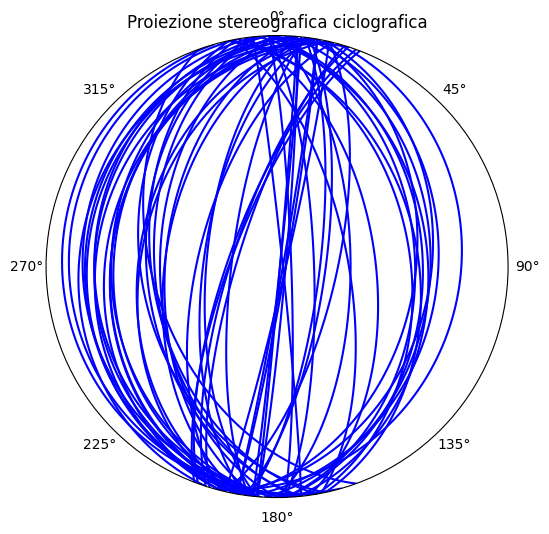

In [18]:


# Caricamento del file Excel
# file_path = "ProiezioniStereografiche.xlsx"  # Modifica con il percorso corretto del tuo file
# df = pd.read_excel(file_path)

# # Estrazione delle colonne
# immersione = df["immersione"]
# inclinazione = df["inclinazione"]

# Creazione della figura stereografica
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='stereonet'))

# Traccia le proiezioni ciclografiche dei piani
ax.plane(strike_RHR, inclinazione, 'b', label="Piani")

# # Calcola i poli dei piani e li traccia
# poli_trend, poli_plunge = mpl.pole(immersione, inclinazione)
# ax.pole(immersione, inclinazione, 'ro', label="Poli")

# Aggiunta della legenda e del titolo
#ax.legend()
ax.set_title("Proiezione stereografica ciclografica")

# Mostra il grafico
plt.show()


In [19]:
#print(poli_trend)
#print(immersione)

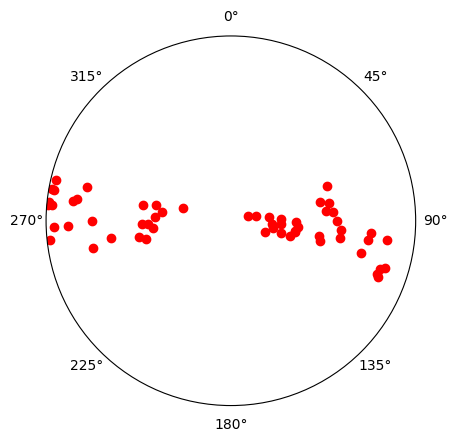

In [20]:
#FISHER#

fig = plt.figure()
ax = fig.add_subplot(111, projection='stereonet')
# ax.line(poli_trend, poli_plunge, color="black", markersize=2)

# # Caricamento del file Excel
# file_path = "ProiezioniStereografiche.xlsx"  # Modifica con il percorso corretto del tuo file
# df = pd.read_excel(file_path)

# # Estrazione delle colonne
# immersione = df["immersione"]
# inclinazione = df["inclinazione"]

# # Calcola i poli dei piani e li traccia
# poli_trend, poli_plunge = mpl.pole(immersione, inclinazione)
ax.pole(strike_RHR, inclinazione, 'ro', label="S1 Poli")




vector: (73.99377288189807, 184.8506220720062)
(0.7273150337686478, 11.650564198061343, 3.6028980765934087)
(73.99377288189807, 184.8506220720062)
(0.7273150337686478, 11.650564198061343, 3.6028980765934087)
valore di R:  0.7273150337686478


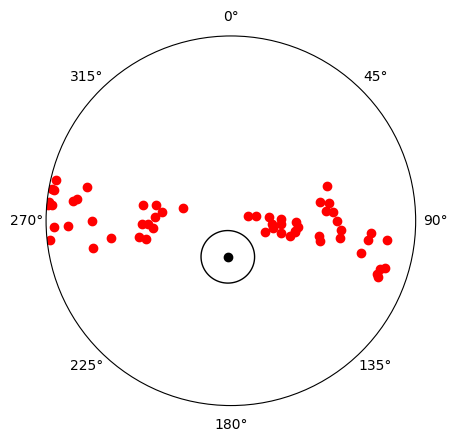

   FisherPlunge  FisherTrend         R  Confidence         K
0     73.993773   184.850622  0.727315   11.650564  3.602898


In [21]:
##FISHER STATISTICS
fig = plt.figure()
ax = fig.add_subplot(111, projection='stereonet')
ax.pole(strike_RHR, inclinazione, 'ro', label="S1 Poli")
confidence = 95
vector, stats = mpl.find_fisher_stats( inclinazione, strike_RHR, conf=confidence)
print("vector:", vector)
print(stats)

ax.line(vector[0], vector[1], color="black", label="fisher")
ax.cone(vector[0], vector[1], stats[1], facecolor="None", edgecolor="black")

print(vector) #plunge, trend
print(stats) #r, confidence, k
print("valore di R: ",stats[0])

### SALVARE DATI SU DATAFRAME (PANDAS) una linea per dataset con LABEL
results_df_Fisher = pd.DataFrame({
    "FisherPlunge": [vector[0]],
    "FisherTrend": [vector[1]],
    "R": [stats[0]],
    "Confidence": [stats[1]],
    "K": [stats[2]]
})



plt.show()
print(results_df_Fisher)

In [8]:
# # ==================
# # Calcolo Statistica 
# # ==================

# #Conversione in coordinate cartesiane dei poli (unit vectors)
# trend = np.radians(inclinazione)
# plunge = np.radians(immersione)

# #Calcolo versori dei poli
# y = np.cos(plunge) * np.sin(trend)
# x = np.cos(plunge) * np.cos(trend)
# z = np.sin(plunge)

# #Matrice Nx3 dei versori
# vectors = np.column_stack((x, y, z))

# #Somma vettoriale e modulo
# R_vector = np.sum(vectors, axis=0)
# R = np.linalg.norm(R_vector)

# #Versore medio
# mean_direction = R_vector / R

# #Numero di dati
# N = len(vectors)
# R_bar = R / N

# #Calcolo di kappa (approssimazione di Fisher)
# if R_bar < 0.9:
#     kappa = (R_bar * (3 - R_bar**2)) / (1 - R_bar**2)
# else:
#     kappa = 1 / (1 - R_bar)

# # conversione in immerione e inclinazione
# plunge = np.degrees(np.arcsin(mean_direction[2]))
# trend = np.degrees(np.arctan2(mean_direction[1], mean_direction[0]))
# #mean_plunge = np.degrees(np.arctan2(mean_direction[2], np.sqrt(mean_direction[0]**2 + mean_direction[1]**2)))
# #mean_trend = np.degrees(np.arctan2(mean_direction[1], mean_direction[0]))
# #Stampa risultati
# print("\n=== Statistica Sferica (Distribuzione di Fisher) ===")
# print(f"Numero di dati (N): {N}")
# print(f"Media direzionale (versore): {mean_direction}")
# print(f"Media direzionale trend/plunge): {plunge, trend}")
# print(f"Modulo della somma dei vettori (R): {R:.3f}")
# print(f"Valore medio R_bar: {R_bar:.3f}")
# print(f"Parametro di concentrazione (kappa): {kappa:.3f}")


[31.0217611  58.96469738  0.82792806]
[ 95.32278743 273.4486384    4.82484907]
[0.59132287 0.40340434 0.01412234]
   BingBestFitPlunge  BingBestFitTrend    v1_tren   v1_plung     v2_tren  \
0          89.172072         94.824849  95.322787  31.021761  273.448638   

    v2_plung   v3_tren  v3_plung    e1_val    e2_val    e3_val  
0  58.964697  4.824849  0.827928  0.591323  0.403404  0.014122  


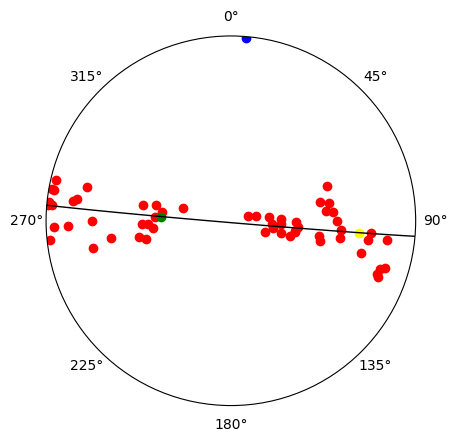

In [9]:
#GIRDLE#

fig = plt.figure()
ax = fig.add_subplot(111, projection='stereonet')

ax.pole(strike_RHR, inclinazione, 'ro', label="Poli")


plu, azi, vals = mpl.eigenvectors(strike_RHR, inclinazione)
print(plu)
print(azi)
print(vals)


ax.line(plu[0], azi[0], color="yellow", label="e1")
ax.line(plu[1], azi[1], color="green", label="e2")
ax.line(plu[2], azi[2], color="blue", label="e3")

fit_Strike_RHR, fit_inclinazione = mpl.fit_girdle(strike_RHR, inclinazione)
ax.plane(fit_Strike_RHR, fit_inclinazione, color='black', lw=1)

# #Calcolo per Flinn
# assex_Flinn=vals[1]/vals[2]
# assey_Flinn=vals[0]/vals[1]

# ##Calcolo per Zingg
# assex_Zingg=vals[2]/vals[1]
# assey_Zingg=vals[0]/vals[0]

#ax.density_contour(strike_RHR, inclinazione, bins=10, cmap='viridis', sigma= 1.5,alpha=.5)
results_df_Bingham = pd.DataFrame({
    "BingBestFitPlunge": fit_inclinazione,
    "BingBestFitTrend": fit_Strike_RHR,
    "v1_tren"  : azi[0],
    "v1_plung" : plu[0],
    "v2_tren"  : azi[1],
    "v2_plung" : plu[1],
    "v3_tren"  : azi[2],
    "v3_plung" : plu[2],
    "e1_val"  : vals[0],
    "e2_val"  : vals[1],
    "e3_val"  : vals[2],
    }, index=[0])

#Calcolo per Flinn
# assex_Flinn=vals[1]/vals[2]
# assey_Flinn=vals[0]/vals[1]

# # ##Calcolo per Zingg
# assex_Zingg=vals[2]/vals[1]
# assey_Zingg=vals[0]/vals[0]

# results_df_Bingham = pd.DataFrame({
#     "assex_Flinn" : assex_Flinn
#     "assey_Flinn" : assey_Flinn
#     "assex_Zingg" : assex_Zingg
#     "assey_Zingg" : assey_Zingg
# }, index=[0])

print(results_df_Bingham)


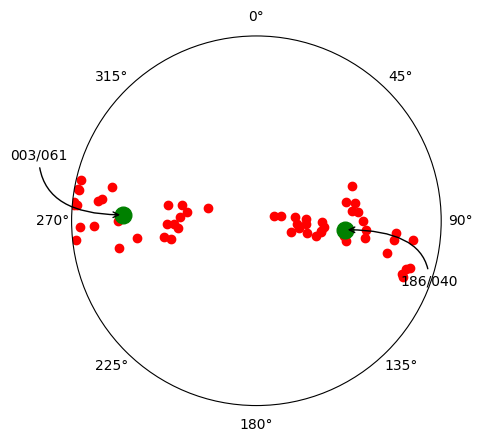

In [10]:
#KMEANS#
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='stereonet')
# ax.line(poli_trend, poli_plunge, color="black", markersize=1)

# # Caricamento del file Excel
# file_path = "ProiezioniStereografiche.xlsx"  # Modifica con il percorso corretto del tuo file
# df = pd.read_excel(file_path)

# # Estrazione delle colonne
# immersione = df["immersione"]
# inclinazione = df["inclinazione"]

# # Calcola i poli dei piani e li traccia
# poli_trend, poli_plunge = mpl.pole(immersione, inclinazione)
# ax.pole(immersione, inclinazione, 'ro', label="Poli")

fig = plt.figure()
ax = fig.add_subplot(111, projection='stereonet')
#ax.line(inclinazione, strike_RHR, color="black", markersize=2)
ax.pole(strike_RHR, inclinazione, 'ro', label="Poli")

centers=mpl.kmeans(strike_RHR,inclinazione,num=2)
Strike_RHR_cent, inclinazione_cent = mpl.geographic2pole(*zip(*centers))
ax.pole(Strike_RHR_cent, inclinazione_cent, 'go', ms=12)

for (x0, y0) in centers:
    s, d = mpl.geographic2pole(x0, y0)
    x, y = mpl.pole(s, d) # Otherwise, we may get the antipode

    if x > 0:
        kwargs = dict(xytext=(40, -40), ha='left')
    else:
        kwargs = dict(xytext=(-40, 40), ha='right')

    ax.annotate('{:03.0f}/{:03.0f}'.format(s[0], d[0]), xy=(x, y),
                xycoords='data', textcoords='offset points',
                arrowprops=dict(arrowstyle='->', connectionstyle='angle3'),
                **kwargs)

plt.show()

results_df_KMeans = pd.DataFrame({
    "KMeansPlunge1": inclinazione_cent[0],
    "KMeansTrend1": Strike_RHR_cent[0],
    "KMeansPlunge2": inclinazione_cent[1],
    "KMeansTrend2": Strike_RHR_cent[1]
}, index=[0])


In [11]:
#Calcolo per Flinn
assex_Flinn=vals[1]/vals[2]
assey_Flinn=vals[0]/vals[1]

##Calcolo per Zingg
assex_Zingg=vals[2]/vals[1]
assey_Zingg=vals[0]/vals[0]

Results_Flinn_Zingg=pd.DataFrame({
    "assex_Flinn" : assex_Flinn,
    "assey_Flinn" : assey_Flinn,
    "assex_Zingg" : assex_Zingg,
    "assey_Zingg" : assey_Zingg
}, index=[0])


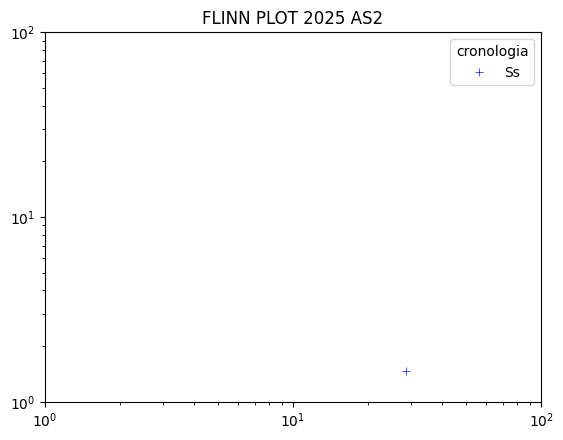

In [12]:
#FLINN PLOT
sns.scatterplot(data=results_df_dati, x=assex_Flinn, y=assey_Flinn, hue="cronologia", marker="+", palette=['blue']).set_title('FLINN PLOT 2025 AS2')
##^^^^ QUI DOVETE CAMBIARE LE INTESTAZIONI degli assi x e y^^^^^

# control x and y limits
plt.ylim(10**0, 10**2)
plt.xlim(10**0, 10**2)
#plt.ylim(0,30)
#plt.xlim(0,30)
plt.xscale('log')
plt.yscale('log')
plt.show()


([<matplotlib.axis.YTick at 0x13ff8e830>,
 [Text(0, 0.0, '0'),
  Text(0, 0.33, '1/3'),
  Text(0, 0.66, '2/3'),
  Text(0, 1.0, '3/3')])

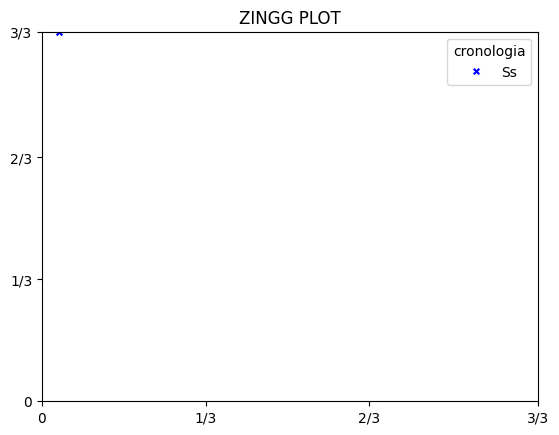

In [13]:
#ZINGG PLOT

sns.scatterplot(data=results_df_dati, x=assex_Zingg, y=assey_Zingg, hue="cronologia", marker="X", palette=['blue']).set_title('ZINGG PLOT')
##^^^^ QUI DOVETE CAMBIARE LE INTESTAZIONI degli assi x e y^^^^^

# control x and y limits
plt.ylim(0, 1)
plt.xlim(0, 1)
#plt.set_yticks(range(len(data)-5))
#plt.xscale('log')
#plt.yscale('log')
# specify positions of ticks on x-axis and y-axis
plt.xticks([0, 0.33, 0.66, 1], ['0', '1/3', '2/3', '3/3'])
plt.yticks([0, 0.33, 0.66, 1], ['0', '1/3', '2/3', '3/3'])

In [14]:
#PRG TRANGULAR PLOT VOLLMER
import plotly.express as px

R_RPG = 3*results_df_Bingham["e3_val"]
G_RPG = 2*(results_df_Bingham["e2_val"]-results_df_Bingham["e3_val"])
P_RPG = results_df_Bingham["e1_val"]-results_df_Bingham["e2_val"]


fig = px.scatter_ternary(results_df_dati, a=P_RPG, b=G_RPG, c=R_RPG, color="cronologia",
                        labels={'a': 'P', 'b': 'G', 'c': 'R'},
                        title='PRG Ternary Plot',
                        color_discrete_sequence=['blue'])

results_df_PRG=pd.DataFrame({
    "R_RPG" : R_RPG,
    "G_RPG" : G_RPG,
    "P_RPG" : P_RPG,
})

fig.show()



In [15]:
results_df = pd.DataFrame
results_df = pd.concat([results_df_Fisher,results_df_Bingham,results_df_KMeans,Results_Flinn_Zingg,results_df_PRG], axis=1)
results_df.to_excel(f"Results_{cronologia_selezionata}.xlsx", index=False)

print(results_df)

Risultati = pd.read_excel(f"Results_{cronologia_selezionata}.xlsx")

Risultati.head()

   FisherPlunge  FisherTrend         R  Confidence         K  \
0     73.993773   184.850622  0.727315   11.650564  3.602898   

   BingBestFitPlunge  BingBestFitTrend    v1_tren   v1_plung     v2_tren  ...  \
0          89.172072         94.824849  95.322787  31.021761  273.448638  ...   

   KMeansTrend1  KMeansPlunge2  KMeansTrend2  assex_Flinn  assey_Flinn  \
0    185.781752      61.488308      2.542784    28.564978     1.465832   

   assex_Zingg  assey_Zingg     R_RPG     G_RPG     P_RPG  
0     0.035008          1.0  0.042367  0.778564  0.187919  

[1 rows x 27 columns]


,FisherPlunge,FisherTrend,R,Confidence,K,BingBestFitPlunge,BingBestFitTrend,v1_tren,v1_plung,v2_tren,...,KMeansTrend1,KMeansPlunge2,KMeansTrend2,assex_Flinn,assey_Flinn,assex_Zingg,assey_Zingg,R_RPG,G_RPG,P_RPG
0,73.993773,184.850622,0.727315,11.650564,3.602898,89.172072,94.824849,95.322787,31.021761,273.448638,...,185.781752,61.488308,2.542784,28.564978,1.465832,0.035008,1,0.042367,0.778564,0.187919
